<a href="https://colab.research.google.com/github/aparna993/Capstone-Project/blob/main/COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID 19 Detector**

In [1]:
#Importing all libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

# **Model**

In [2]:
# Model building using keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy','mse','AUC','Precision','Recall'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

# **Training and Test Data Generation**

In [4]:
# Data processing for model training

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [5]:
#Training Data 
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),#specified target size
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [7]:
#Test Data
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [8]:
#Training the model
history = model.fit_generator(
    train_generator,
    # steps_per_epoch=8
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 1.0553 - accuracy: 0.5402 - mse: 0.3173 - auc: 0.5353 - precision: 0.5287 - recall: 0.7411 - val_loss: 0.6849 - val_accuracy: 0.5000 - val_mse: 0.2459 - val_auc: 0.8922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.6532 - accuracy: 0.6518 - mse: 0.2271 - auc: 0.6923 - precision: 0.6700 - recall: 0.5982 - val_loss: 0.5771 - val_accuracy: 0.7667 - val_mse: 0.1933 - val_auc: 0.9706 - val_precision: 1.0000 - val_recall: 0.5333
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.5064 - accuracy: 0.7545 - mse: 0.1644 - auc: 0.8780 - precision: 0.7176 - recall: 0.8393 - val_loss: 0.5020 - val_accuracy: 0.9500 - val_mse: 0.1567 - val_auc: 0.9839 - val_precision: 0.9655 - val_recall: 0.9333
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss

# **Results**

dict_keys(['loss', 'accuracy', 'mse', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_mse', 'val_auc', 'val_precision', 'val_recall'])


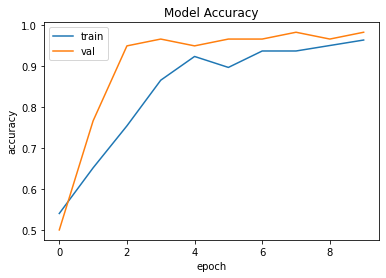

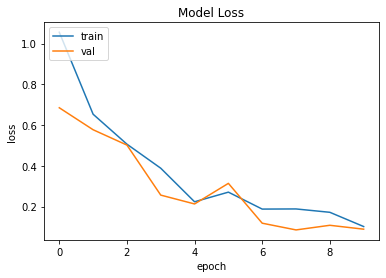

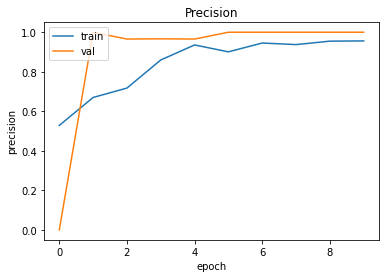

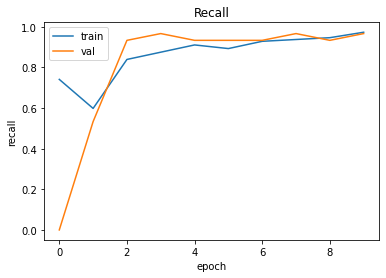

In [10]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()